<a href="https://colab.research.google.com/github/kingsman-del/VisageSecure-/blob/main/Visage_security_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=232992354b6fcdc5b4328ba5ef6a7084ccbbd352014ea91c46066e1d2f3cdbbc
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt





In [ ]:
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
areatrust = ctrl.Antecedent(np.arange(0, 1, 0.01), 'area_trust')
visitedplace = ctrl.Antecedent(np.arange(0, 1, 0.01), 'visited_place')
Numberofattempt = ctrl.Antecedent(np.arange(0, 1, 0.01), 'NumberOfAttempt')

risk = ctrl.Consequent(np.arange(0, 1, 0.01), 'risk')

In [ ]:
areatrust.automf(3)

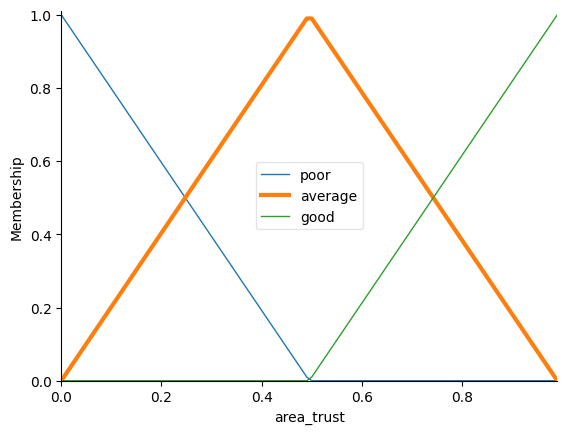

In [ ]:
areatrust['average'].view()

In [ ]:
visitedplace.automf(3)

In [ ]:
Numberofattempt.automf(3)

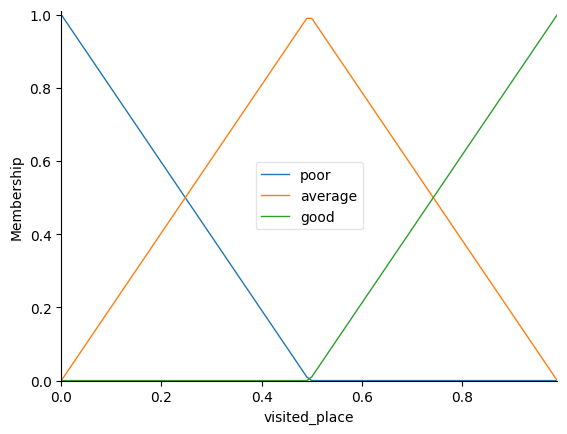

In [ ]:
visitedplace.view()

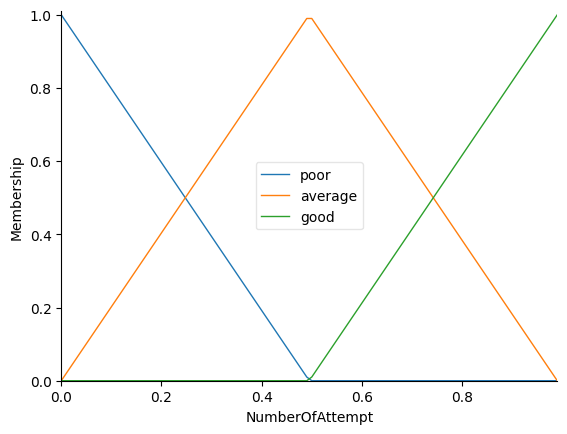

In [ ]:
Numberofattempt.view()

In [ ]:
risk.automf(5)

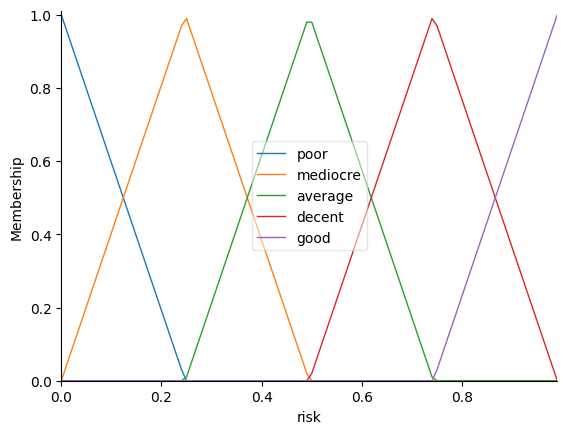

In [ ]:
risk.view()

In [ ]:
rule1 = ctrl.Rule(areatrust['poor'] & visitedplace['poor'] & Numberofattempt['poor'],risk['good'])
rule2 = ctrl.Rule(areatrust['poor'] & visitedplace['poor'] & Numberofattempt['average'],risk['good'])
rule3 = ctrl.Rule(areatrust['poor'] & visitedplace['poor'] & Numberofattempt['good'],risk['decent'])
rule4 = ctrl.Rule(areatrust['poor'] & visitedplace['average'] & Numberofattempt['poor'],risk['good'])
rule5 = ctrl.Rule(areatrust['poor'] & visitedplace['average'] & Numberofattempt['average'],risk['average'])
rule6 = ctrl.Rule(areatrust['poor'] & visitedplace['average'] & Numberofattempt['good'],risk['decent'])
rule7 = ctrl.Rule(areatrust['poor'] & visitedplace['good'] & Numberofattempt['poor'],risk['average'])
rule8 = ctrl.Rule(areatrust['poor'] & visitedplace['good'] & Numberofattempt['average'],risk['mediocre'])
rule9 = ctrl.Rule(areatrust['poor'] & visitedplace['good'] & Numberofattempt['good'],risk['good'])
rule10 = ctrl.Rule(areatrust['average'] & visitedplace['poor'] & Numberofattempt['poor'],risk['decent'])
rule11 = ctrl.Rule(areatrust['average'] & visitedplace['poor'] & Numberofattempt['average'],risk['average'])
rule12 = ctrl.Rule(areatrust['average'] & visitedplace['poor'] & Numberofattempt['good'],risk['decent'])
rule13 = ctrl.Rule(areatrust['average'] & visitedplace['average'] & Numberofattempt['poor'],risk['average'])
rule14 = ctrl.Rule(areatrust['average'] & visitedplace['average'] & Numberofattempt['average'],risk['mediocre'])
rule15 = ctrl.Rule(areatrust['average'] & visitedplace['average'] & Numberofattempt['good'],risk['average'])
rule16 = ctrl.Rule(areatrust['average'] & visitedplace['good'] & Numberofattempt['poor'],risk['mediocre'])
rule17 = ctrl.Rule(areatrust['average'] & visitedplace['good'] & Numberofattempt['average'],risk['poor'])
rule18 = ctrl.Rule(areatrust['average'] & visitedplace['good'] & Numberofattempt['good'],risk['decent'])
rule19 = ctrl.Rule(areatrust['good'] & visitedplace['poor'] & Numberofattempt['poor'],risk['average'])
rule20 = ctrl.Rule(areatrust['good'] & visitedplace['poor'] & Numberofattempt['average'],risk['mediocre'])
rule21 = ctrl.Rule(areatrust['good'] & visitedplace['poor'] & Numberofattempt['good'],risk['average'])
rule22 = ctrl.Rule(areatrust['good'] & visitedplace['average'] & Numberofattempt['poor'],risk['mediocre'])
rule23 = ctrl.Rule(areatrust['good'] & visitedplace['average'] & Numberofattempt['average'],risk['poor'])
rule24 = ctrl.Rule(areatrust['good'] & visitedplace['average'] & Numberofattempt['good'],risk['mediocre'])
rule25 = ctrl.Rule(areatrust['good'] & visitedplace['good'] & Numberofattempt['poor'],risk['poor'])
rule26 = ctrl.Rule(areatrust['good'] & visitedplace['good'] & Numberofattempt['average'],risk['poor'])
rule27 = ctrl.Rule(areatrust['good'] & visitedplace['good'] & Numberofattempt['good'],risk['poor'])


(<Figure size 640x480 with 1 Axes>, <Axes: >)

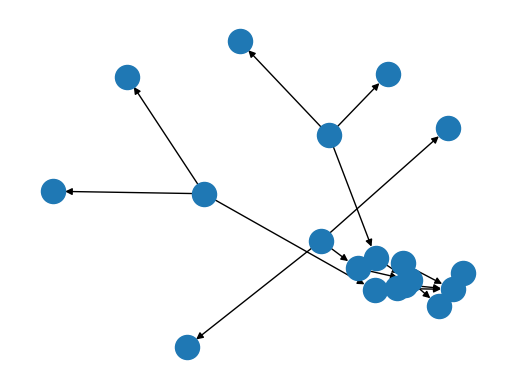

In [ ]:
rule1.view()

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])

In [ ]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [ ]:
tipping.input['area_trust'] = 0.5
tipping.input['visited_place'] = 0.5
tipping.input['NumberOfAttempt']=0.6

# Crunch the numbers
tipping.compute()

In [ ]:
score = tipping.output['risk']

In [ ]:
score

0.31492573899984105

0.31492573899984105


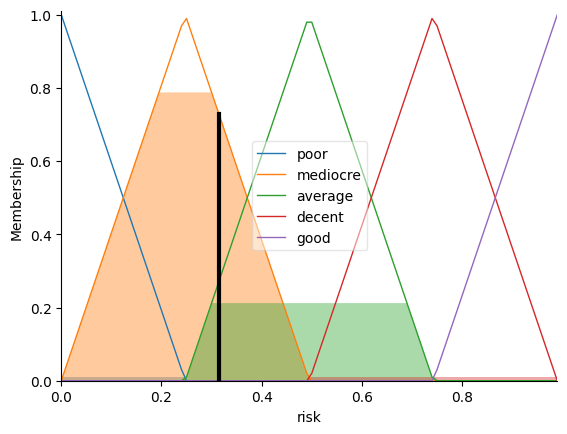

In [ ]:
print (tipping.output['risk'])
risk.view(sim=tipping)

In [ ]:
import random, itertools
choices = [''.join(x) for x in itertools.permutations('0123456789', 5)]
random.choice(choices)
y=random.choice(choices)
print("Random : " + str(y))

Random : 16053


In [ ]:
if (score > 0) & (score < 0.125):
  safety="very low"
elif (score >=0.125) & (score < 0.375):
  safety="low"
elif (score >= 0.375) & (score < 0.625):
  safety="medium"
elif (score >=0.625) & (score <0.875):
  safety="high"
elif (score >=0.875):
  safety="very high"

In [ ]:
print(safety)

low


In [ ]:
global a
a=[]

In [ ]:
def shouldSwap(string, start, curr):

    for i in range(start, curr):
        if string[i] == string[curr]:
            return 0
    return 1

# Prints all distinct permutations
# in str[0..n-1]
def findPermutations(string, index, n):

    if index >= n:
        global x

        x=(''.join(string))
        a.append(x)
        return

    for i in range(index, n):

        # Proceed further for str[i] only
        # if it doesn't match with any of
        # the characters after str[index]
        check = shouldSwap(string, index, i)
        if check:
            string[index], string[i] = string[i], string[index]
            findPermutations(string, index + 1, n)
            string[index], string[i] = string[i], string[index]

# Driver code
if __name__ == "__main__":
    if (safety=="very high"):
      text="FFFFN"
      string = list(text)
      n = len(string)
      a=[]
      findPermutations(string, 0, n)

    elif (safety=="high"):
      text="FFFNN"
      string = list(text)
      n = len(string)
      a=[]
      findPermutations(string, 0, n)

    elif (safety=="medium"):
      text="FFNNN"
      string = list(text)
      n = len(string)
      a=[]
      findPermutations(string, 0, n)

    elif (safety=="low"):
      text="FNNNN"
      string = list(text)
      n = len(string)
      a=[]
      findPermutations(string, 0, n)

    elif (safety=="very low"):
      text="NNNNN"
      string = list(text)
      n = len(string)
      a=[]
      findPermutations(string, 0, n)








In [ ]:
print(a)

['FNNNN', 'NFNNN', 'NNFNN', 'NNNFN', 'NNNNF']


In [ ]:
random_num = random.choice(a)

# printing random number
print("Random : " + str(random_num))

Random : NNFNN
